In [66]:
import os
import numpy as np
import matplotlib
import torch

import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

from scipy import signal



# def res_block(channels,ks):
#     layers = [nn.Conv1d(channels, channels, kernel_size=ks, padding=int((ks-1)/2)), 
#               nn.BatchNorm1d(channels), 
#               nn.ReLU(inplace=True),
#               nn.Conv1d(channels, channels, kernel_size=ks, padding=int((ks-1)/2)), 
#               nn.BatchNorm1d(channels)]
    
#     return nn.Sequential(*layers)

class Net_Res(nn.Module):
    def __init__(self):
        super(Net_Res,self).__init__()
        n_ch = 64  # channel of input 
        n1 = 20  # This directly affects accuracy if value is low.
        n2 = 50
        n3 = 50
        n4 = 50
        n5 = 50
        n_l1=9216
        n_l2=200
       
        n_out =8   # output channel  (classification)
        oc = 2
        self.conv1 = nn.Conv1d(n_ch, n1, 100, 4)
        self.bn1 = nn.BatchNorm1d(n1)
        # self.res1 = res_block(n1,25)
        self.conv2 = nn.Conv1d(n1, n2, 25,2)
        self.bn2 = nn.BatchNorm1d(n2)
        # self.res2 = res_block(n2,25)
        self.conv3 = nn.Conv1d(n2, n3, 5,2)
        self.bn3 = nn.BatchNorm1d(n3)
        # self.res3 = res_block(n3,51)
        self.conv4 = nn.Conv1d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm1d(n4)
           # self.conv5 = nn.Conv1d(n4, n5, 2)
        # self.bn5 = nn.BatchNorm1d(n5
        self.pool1=nn.MaxPool1d(2)
        # self.res4 = res_block(n4,25)
     )
    
        self.res1 = nn.Sequential(
            nn.Conv1d(n1, n1, kernel_size=25, stride=1, padding=12, bias=False),
            nn.BatchNorm1d(n1)
            
        )
        self.res2 = nn.Sequential(
            nn.Conv1d(n2, n2, kernel_size=11, stride=1, padding=5, bias=False),
            nn.BatchNorm1d(n2)
           
        )
        self.res3 = nn.Sequential(
            nn.Conv1d(n3, n3, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm1d(n3)
           
        )
        self.res4 = nn.Sequential(
            nn.Conv1d(n4, n4, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm1d(n4)
           
        )
        
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, n_out)
        


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x=F.relu(self.res1(x)+x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x=F.relu(self.res2(x)+x)
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x=F.relu(self.res3(x)+x)
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x=F.relu(self.res4(x)+x)
       
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x


IndentationError: ignored

In [139]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        n_ch = 64  # channel of input 
        n1 = 128 # This directly affects accuracy if value is low.
        n2 = 128
        n3 = 64
        n4 = 64
        
        n_l1=4544
        n_l2=200
       
        n_out =8   # output channel  (classification)
        oc = 2
        self.conv1 = nn.Conv1d(n_ch, n1, 100, 4)
        self.bn1 = nn.BatchNorm1d(n1)
        #self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(n1, n2, 25,2)
        self.bn2 = nn.BatchNorm1d(n2)
        self.conv3 = nn.Conv1d(n2, n3, 5,2)
        self.bn3 = nn.BatchNorm1d(n3)
        self.conv4 = nn.Conv1d(n3, n4, 2,2)
        self.bn4 = nn.BatchNorm1d(n4)
        # self.conv5 = nn.Conv1d(n4, n5, 2,2)
        # self.bn5 = nn.BatchNorm1d(n5)
        #self.pool1=nn.AvgPool1d(2)
        #self.pool2=nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(n_l1, n_l2)
        self.fc2 = nn.Linear(n_l2, n_out)
        


    def forward(self, x):
    
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        #print(x.shape)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        #print(x.shape)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        # x = self.conv5(x)
        # x = F.relu(self.bn5(x))
        #x = self.pool1(x)
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
       
        
        return x

In [2]:
def conv_block(in_channels, out_channels, ks, pool=False):
    layers = [nn.Conv1d(in_channels, out_channels, kernel_size=ks, padding=int((ks-1)/2)), 
              nn.BatchNorm1d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)



class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 32, 51, pool=False)
        
        self.res1 = res_block(32,25)
        self.pool1 = nn.MaxPool1d(2)
        self.res2 = res_block(32,11)
        self.pool2 = nn.MaxPool1d(2)
        self.res3 = res_block(32,5)
        self.pool3 = nn.MaxPool1d(2)
        self.conv2 = conv_block(32, 32*2, 11,pool=True)
        
        self.res4 = res_block(32,5)
        self.res5 = res_block(32,5)
        self.res6 = res_block(32,5)
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(2496, 200),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(200, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        #print(out.shape)
        out = F.relu(self.res1(out) + out)
        #print(out.shape)
        out = F.relu(self.res2(out) + out)
        #print(out.shape)
        out = F.relu(self.res3(out) + out)
        #print(out.shape)
        out = self.conv2(out)
        #print(out.shape)
        out = F.relu(self.res4(out) + out)
        out = F.relu(self.res5(out) + out)
        out = F.relu(self.res6(out) + out)
        #print(out.shape)
        out = self.classifier(out)
        return out


In [145]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
file_name_train=r"/content/drive/My Drive/Colab Notebooks/RFMG_VAE/data/Data_all2.mat"


data = scipy.io.loadmat(file_name_train)
feature_all = data['feature_all'][:,:,:]   ## waveform * channel * case 
feature_all=np.swapaxes(feature_all,0,2)
self_channel=[0,1,10,11,20,21,30,31]
#self_channel=[30]
feature_all_ch=feature_all[:,self_channel,:]   ## case * channel * waveform

feature_all_norm = data['feature_all_norm'][:,:,:]
feature_all_norm=np.swapaxes(feature_all_norm,0,2)
feature_all2=np.concatenate((feature_all, feature_all_norm), axis=1)

label_all = data['label_all']
caseNum_all = data['caseNum_all']
label_all_1 = data['label_all_1']
label_all_2 = data['label_all_2']
Chan_Name = data['Chan_Name']


X=feature_all2;
y=label_all;

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=caseNum_all)

print(X_train.shape)
print(y_test.shape)

(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(284, 64, 2500)
(72, 1)
[[ 0 10]
 [ 1 14]
 [ 2 16]
 [ 3  5]
 [ 4  8]
 [ 5  8]
 [ 6  6]
 [ 7  5]]


0.12622361241931646
0.12351171341207293
0.0789415846828004
0.08200832539134556
0.04617119003349627
0.06417565130525166
0.02576430666614586
0.05130903753969404
0.013874131976298883
0.047516704019573
0.007988207435733835
0.037599999043676585
0.005459225539800147
0.038266316056251526
0.004339914939458102
0.03951134532690048
0.0017981593805352148
0.04036444301406542
0.0012572752213446607
0.0368053557144271
0.0009688713840327002
0.03924919830428229
0.000813526296529027
0.04088588431477547
0.0005857104576573195
0.039794852336247764
0.00044782978030000355
0.04053056281473902
0.00038138107383545015
0.0398442799018489
total training time is 13.38353419303894


<Figure size 432x288 with 0 Axes>

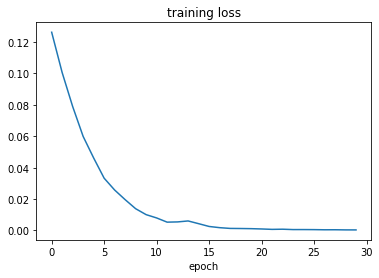

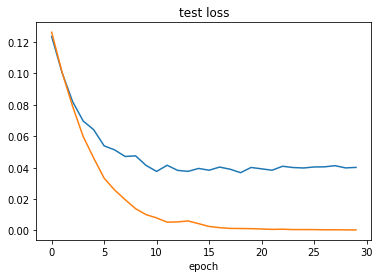

In [152]:
import torch
torch.cuda.empty_cache()
if __name__ == '__main__':
    
    
    #print(dataset[100])
    #print(dataset[122:124])

    #totaldata_loader = DataLoader(dataset, batch_size=len(trainset), shuffle=True)
    #print(next(iter(dataloader)))
    batchsize_train = 16

    train_loader = DataLoader(TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)), batch_size=batchsize_train,shuffle=True)
    batchsize_test = 16
    test_loader = DataLoader(TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test)), batch_size=batchsize_test, shuffle=False)
            
    
    n_epoch=25
    learning_rate = 5e-5  #学习的速率 越小越精细
    momentum = 0.1
    random_seed=1
    torch.backends.cudnn.enabled = False
    torch.manual_seed(random_seed)     #设定随机数种子为固定值
    
    train_loss_epoch = []
    test_acc_epoch =[]
    total_acc_epoch = []
    #epoch_range = np.arange(25,225,25)
    epoch_range = np.array([2])

    
    
    network = Net().cuda()   # 1d cnn

    
    #training
    optimizer = optim.Adam(network.parameters(), lr=learning_rate)
    
    #optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)
    
    plt.figure()
    
    #network.train()
    Training_Loss = []
    Test_Loss = []
    start_time = time.time()
    criterion = nn.CrossEntropyLoss()
    #criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1, 3]).cuda())
    for epoch in range(n_epoch):   # loop over the dataset multiple times
        train_loss = 0
        for X, Y in train_loader:
            X = X.view(-1,X.shape[1],X.shape[2]).cuda()
            X = X.float()  
            Y = Y.long().view(-1, ).cuda() 
            current_batchsize = X.shape[0]
            optimizer.zero_grad()
            output = network(X)
            loss = criterion(output,Y)
            train_loss = train_loss + loss.item()
            loss.backward()                     #calculate the gradient decent
            optimizer.step()                    #update the weight
            
          





        test_loss = 0
        correct = 0
        total = 0
        test_y= []
        test_y_p = []
        # sens = 0    # sensitivity = TP/(TP + FN)
        # prec = 0    # precision = TP/(TP + FP)
        with torch.no_grad():        
            # X = X.view(-1,X.shape[1],X.shape[2])
            # X = X.float()         
            for X, Y in test_loader:
                X = torch.Tensor(X).cuda()
                Y = torch.Tensor(Y).long().view(-1, ).cuda()
                images, labels = X, Y
                # calculate outputs by running images through the network
                outputs = network(images)
                loss = criterion(outputs,Y)
                test_loss = test_loss + loss.item()

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                for i in range(len(labels)):
                  test_y.append(labels[i])
                  test_y_p.append(predicted[i])
        
        #print('Accuracy of test cases: %d %%' % (100 * correct / total))
 

        Training_Loss.append(train_loss/len(train_loader.dataset))
        Test_Loss.append(test_loss/len(test_loader.dataset))
        if epoch%2==0:
            print(train_loss/len(train_loader.dataset))
            print(test_loss/len(test_loader.dataset))
        # if epoch%20==0:
        #     torch.save(network.state_dict(), r"/content/drive/My Drive/Colab Notebooks/CNN_sleep center/result/pred_v1/record/epoch_{}.pt".format(epoch))
            

    
    train_loss_epoch.append(Training_Loss[-1])
    training_time=time.time()-start_time
    print('total training time is',training_time)
    
    plt.figure()
    plt.plot(Training_Loss)
    plt.title("training loss")
    plt.xlabel("epoch")
    plt.show()

    plt.figure()
    plt.plot(Test_Loss)
    plt.title("test loss")
    plt.xlabel("epoch")
    plt.plot(Training_Loss)
    plt.show()



['Tims']


In [153]:
from sklearn.metrics import confusion_matrix
import scipy.io
import seaborn as sn
import pandas as pd
test_y_p=torch.FloatTensor(test_y_p)
test_y=torch.FloatTensor(test_y)
y_p=np.array(test_y_p.cpu())
y=np.array(test_y.cpu())




cm=confusion_matrix(y, y_p)
acc=accuracy_score(y, y_p)
print(cm,acc)

[[ 9  0  0  0  1  0  0  0]
 [ 0 11  1  1  1  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  1  0  1  5  0  1  0]
 [ 0  1  0  1  0  5  1  0]
 [ 1  0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  1  4]] 0.8194444444444444
